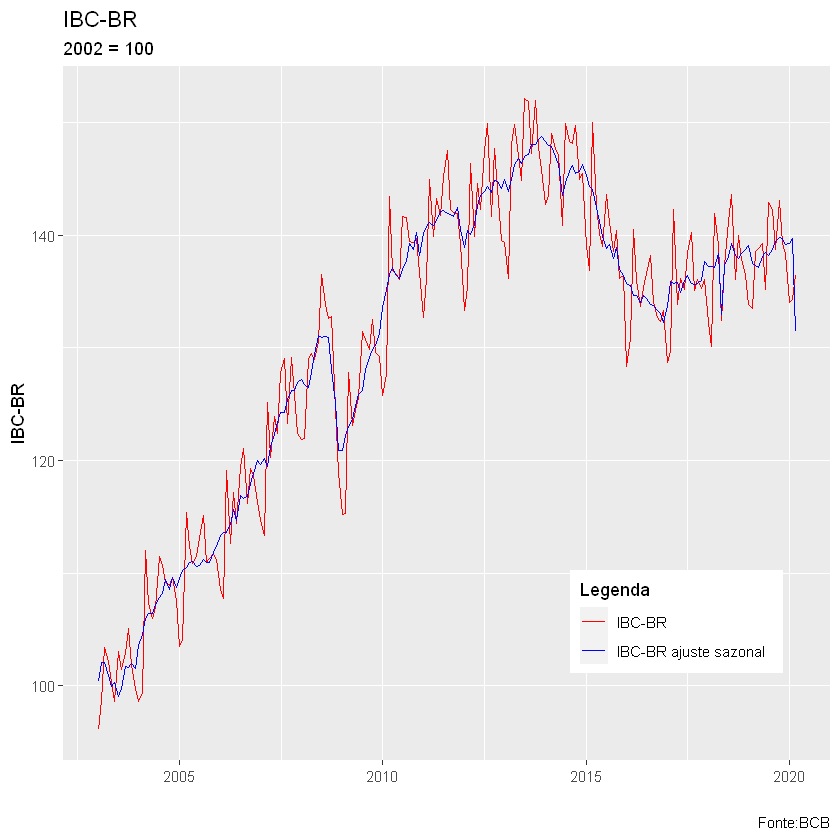

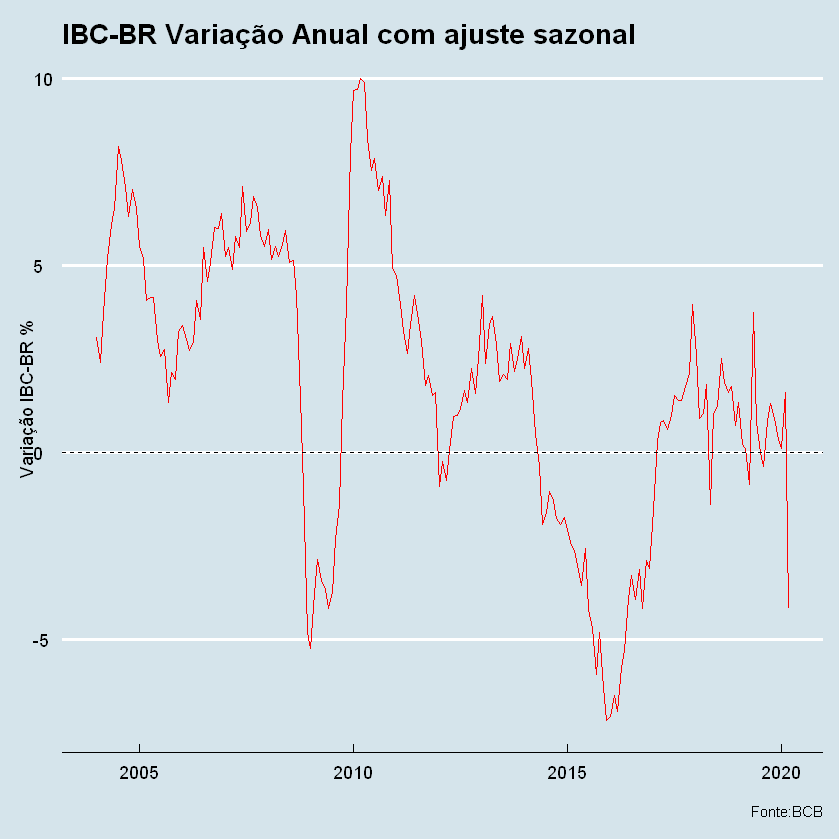

In [2]:
#Pacotes
library(ggplot2)
library(rbcb)
library(ggthemes)
#Coleta de dados
ibc_br <- get_series(c(IBC_BR = 24363), as = "data.frame")
ibc_br_sazonal <- get_series(c(IBC_BR_SAZ = 24364), as = "data.frame")
#Criação de um data frame da variação dos dados
data1 <- seq(as.Date("2004-01-01"), as.Date("2020-03-01"), "1 month")
Variacao_IBC_BR <- (diff(ibc_br$IBC_BR,12)/ibc_br$IBC_BR[12:206])*100
Variacao_Sazonal <- (diff(ibc_br_sazonal$IBC_BR_SAZ,12)/ibc_br_sazonal$IBC_BR_SAZ[12:206])*100
Variacao_tot <- data.frame(Data = data1,
                           Variação_IBC_BR = Variacao_IBC_BR,
                           Variação_Sazonal = Variacao_Sazonal)
#Juntando os dados coletados
ibc_tot <- cbind(ibc_br, ibc_br_sazonal$IBC_BR_SAZ)
colnames(ibc_tot) <- c("Data", "IBC_BR", "IBC_Sazonal")
#Plotando o Gráfico do IBC-BR
ggplot(ibc_tot, aes(x = Data))+
  geom_line(aes(y = IBC_BR, colour = "IBC-BR"))+
  geom_line(aes(y = IBC_Sazonal, colour = "IBC-BR ajuste sazonal"))+
  scale_colour_manual("Legenda", values = c("IBC-BR" = "red",
                                            "IBC-BR ajuste sazonal" = "blue"))+
  theme(legend.position = c(0.8,.2))+
  labs(x = '', y = "IBC-BR", title = "IBC-BR", subtitle = "2002 = 100",
       caption = "Fonte:BCB")
#Plotando o gráfico da variação anual do IBC-BR
ggplot(Variacao_tot, aes(x = Data))+
  geom_line(aes(y = Variacao_Sazonal), colour = "red")+
  geom_hline(yintercept = 0, colour = "black", linetype = 2)+
  labs(x = '', y = "Variação IBC-BR %",
       title = "IBC-BR Variação Anual com ajuste sazonal",
       caption = "Fonte:BCB")+
  theme_economist()